<a href="https://colab.research.google.com/github/Koitoresu/Micro-Credential-Winter-2022/blob/main/CodeLab/WeekThree/Titanic%20Analysis%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

# Loading the data

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_train.csv')

# EDA

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## checking if out dataset has missing data

In [ ]:
train.isnull()    #Checking the DataFrame and returning True in the space 
                  #if the value is NaN and False otherwise.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


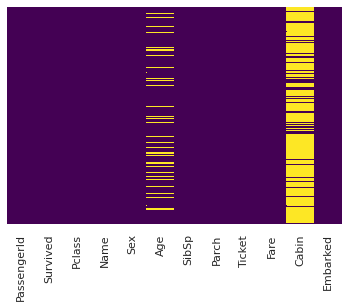

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')
# The heatmap is displaying true/false data 
# the yellow spaces are instances of the data where the value at that location
# returns null/NaN

### As we can see, roughly 20% of the age data is missing. Therefore, the proportion of Age missing is likely small enough for reasonable replacement with some form of inputation. if we look at the Cabin column, we can see that we are missing too much of data to do anything useful at this basic level...

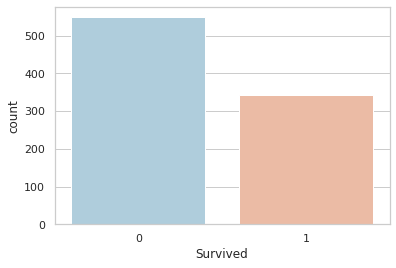

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')
# The "countplot" displays the numbers of people who survived the incident
# 0 represents false, they did not survive.
# 1 represents True, they did survive.

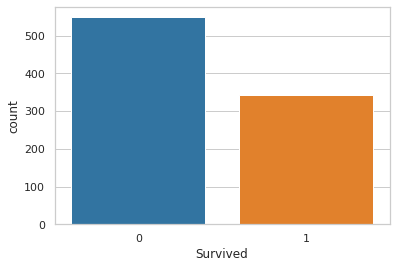

In [ ]:
sns.countplot(x='Survived', data=train, palette="tab10")

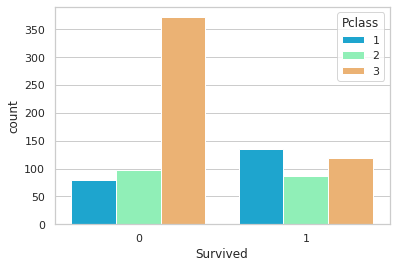

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train, palette='rainbow')
# Similar graph to the count plot above 
# in this case, the "social" classes were seperated for better identification

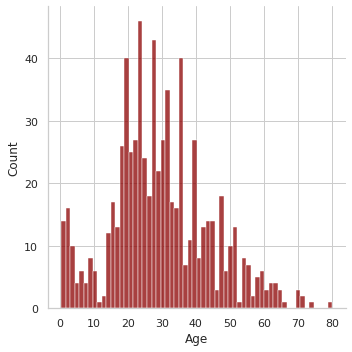

In [ ]:
# We've created a distribution plot
# Displays the number of people from different age groups

sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=60)

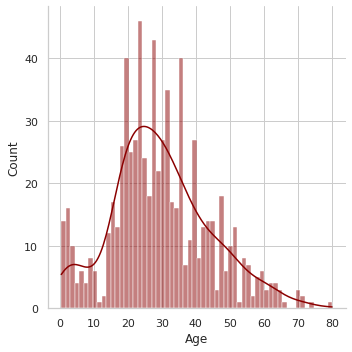

In [ ]:
sns.displot(train['Age'].dropna(), kde=True, color='darkred', bins=60)

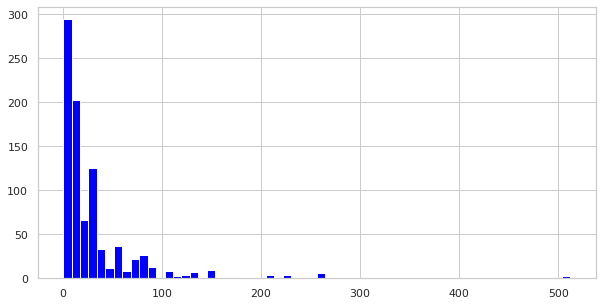

In [ ]:
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

In [ ]:
cf.go_offline()

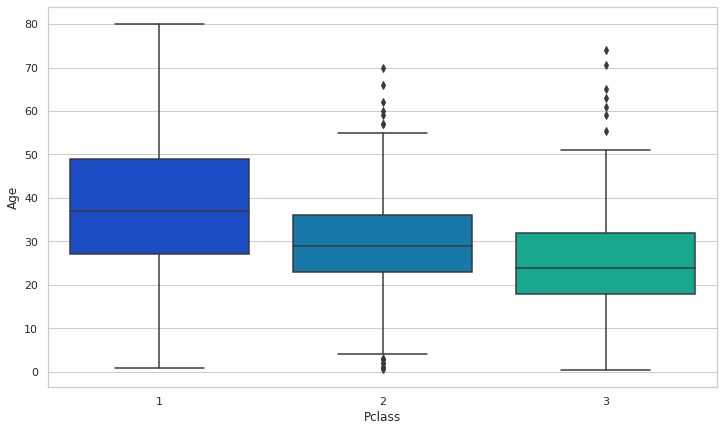

In [ ]:
# We are using another graph, Box plot, to display the age groups within
# the different classes

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

### Since we can determine that people in higher classes tend to be older we can then use these to average age values and inpute according to Pclass for age.

In [ ]:
#defining a function to do 

def inpute_age(cols):       # Function takes one input, cols
  Age = cols[0]             # Accessing the newly recieved input and accessing
                            # the value at index 0, we assign that value to Age

  Pclass = cols[1]          # Similar to Age, we access the value at index 1
                            # and Assign that value into Pclass

  if pd.isnull(Age):        # Testing if the parameter, Age, has any null values
                            # if the result returns true, we continue

    if Pclass == 1:         # if the value of Pclass is equal to 1, return 37
      
      return 37
    elif Pclass == 2:       # if the values of Pclass is equal to 2, return 29
      return 29
    else:                   # if the values were neither 1 nor 2, return 24
      return 24
  else:                     # if the value returned false from 'isnull',
    return Age              # return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)   # 

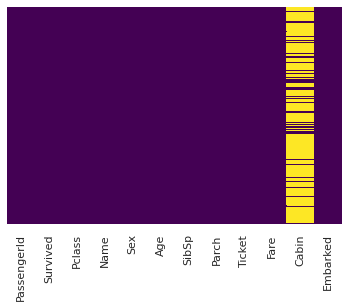

In [ ]:
# Rechecking to see if our 'heatmap' is updated with the new data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')    

In [ ]:
# Dropped our Cabin column since it seemed unnecessary

train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Dropped all NaN values within the DataFrame

train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to directly take in those features as inputs!!

In [ ]:
# Created a dummy variable  which takes all the values from previous Sex column 
# Dropped the first values within the DataFrame 

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [ ]:
# Created a dummy variable  which takes all the values from previous Sex column 
# Dropped the first values within the DataFrame 

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Dropped the Columns Sex, Embarked, Name, and Ticket
# Columns had non-integer Values

train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Concatinates the columns

train = pd.concat([train, sex, embark], axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Calling the 'train_test_split()' function
# Dropped the Survived Column
# Testing the set without the Survived Column
# Testing 30% of the data and training 70%
# Splits array into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creates an instance of the class
# Calling LogisticRegression class

logmodel = LogisticRegression()

In [ ]:
# fit method trains the model
# does endless calculations to detect patterns within the data
# this is how learning occurs in a machine.

logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# Testing the Model

In [ ]:
# Enables us to predict the labels of the data values using X_test
predictions = logmodel.predict(X_test)

# Evaluating the model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# print the accuracy of the model
# y_test = 0, predictions = 1
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



# Printing evaluation and prediction reports

In [ ]:
# prints the mean accuracy on the given test data and labels (it being 80.149%)
print(logmodel.score(X_test,y_test))

#assigns pp the predicted y_test values (basically y_test_predict) which
# are either 0 (did not survive) or 1 (did survive)
pp = logmodel.predict(X_test)

# prints out the number of people that did survived by summing the instances
# where pp was not equal to 0, which means the instances in which
# pp was equal to 1 (a person did survive)
print("Survived", sum(pp!=0))

# prints out the number of people that did not survive by summing the instances
# where pp was equal to 0, which means the instances in which a person did not surive
print("NOT Survived", sum(pp==0))

0.8014981273408239
Survived 79
NOT Survived 188
